<a href="https://colab.research.google.com/github/Vollurisaranya/PRODIGY/blob/main/House_price_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("/content/house_prices.csv")

In [ ]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1.0,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2.0,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2.0,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2.0,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.shape

(1826, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              1826 non-null   int64  
 1   Title              1826 non-null   object 
 2   Description        1781 non-null   object 
 3   Amount(in rupees)  1825 non-null   object 
 4   Price (in rupees)  1637 non-null   float64
 5   location           1825 non-null   object 
 6   Carpet Area        1117 non-null   object 
 7   Status             1818 non-null   object 
 8   Floor              1783 non-null   object 
 9   Transaction        1821 non-null   object 
 10  Furnishing         1771 non-null   object 
 11  facing             1032 non-null   object 
 12  overlooking        1005 non-null   object 
 13  Society            1076 non-null   object 
 14  Bathroom           1812 non-null   float64
 15  Balcony            1033 non-null   object 
 16  Car Parking        723 n

In [ ]:
null_percent = df.isnull().mean() * 100
null_percent

Index                  0.000000
Title                  0.000000
Description            2.464403
Amount(in rupees)      0.054765
Price (in rupees)     10.350493
location               0.054765
Carpet Area           38.828039
Status                 0.438116
Floor                  2.354874
Transaction            0.273823
Furnishing             3.012048
facing                43.483023
overlooking           44.961665
Society               41.073384
Bathroom               0.766703
Balcony               43.428258
Car Parking           60.405257
Ownership             40.470975
Super Area            61.336254
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [ ]:
miss_value_50_perc = null_percent[null_percent > 50]

df = df.drop(columns=miss_value_50_perc.index)

In [ ]:
df.shape


(1826, 17)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cleaned = df.dropna(axis=0)
df_cleaned = df.dropna(axis=1)

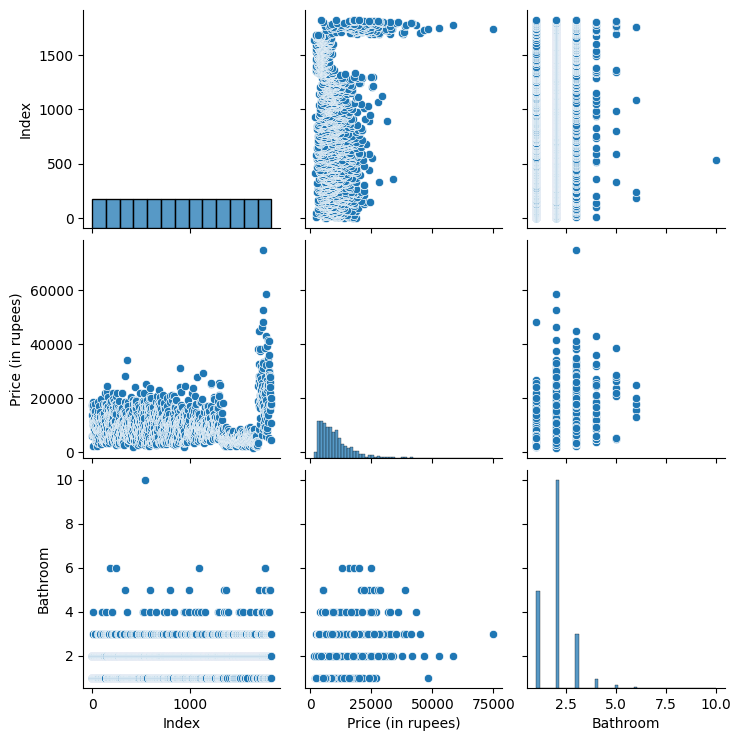

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
Index                  int64
Title                 object
Description           object
Amount(in rupees)     object
Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom             float64
Balcony               object
Ownership             object
dtype: object


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
print(df.dtypes)

Index                  int64
Title                float64
Description          float64
Amount(in rupees)    float64
Price (in rupees)    float64
location             float64
Carpet Area          float64
Status               float64
Floor                float64
Transaction          float64
Furnishing           float64
facing               float64
overlooking          float64
Society              float64
Bathroom             float64
Balcony              float64
Ownership            float64
dtype: object


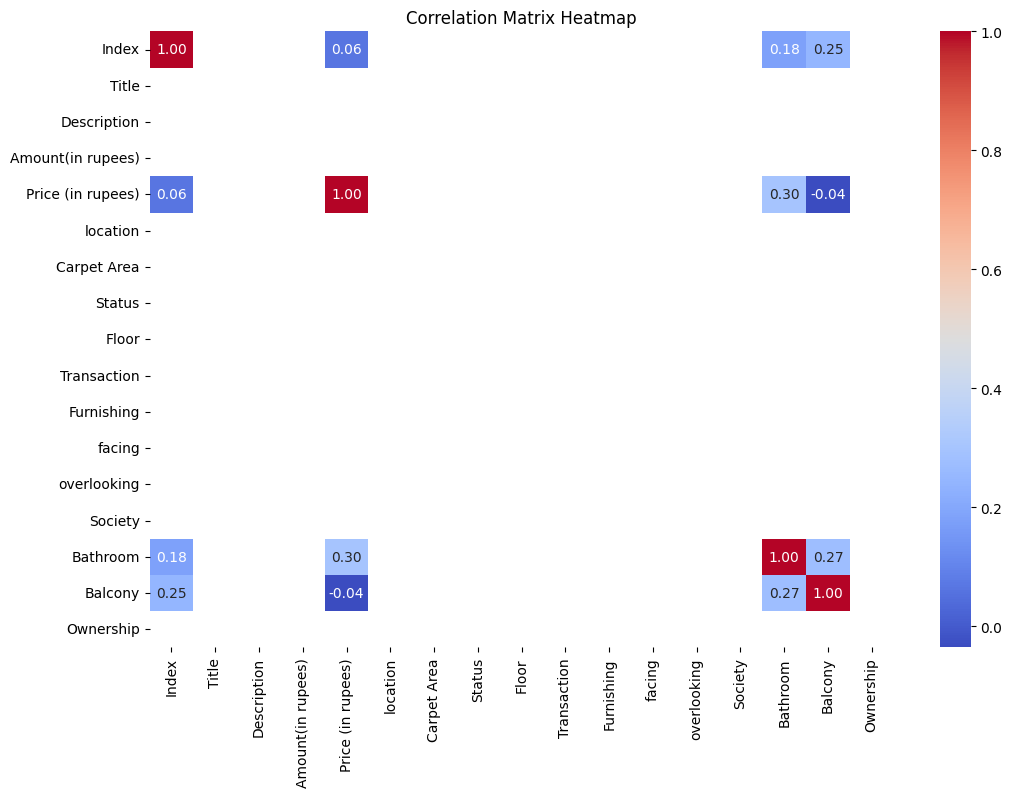

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()